# <center>Визуализация данных PRO<center>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

**1. Постройте heatmap, отображающий среднедневные продажи на разных страницах сайта в зависимости от времени и типа устройства пользователя по имеющимся данным.** 

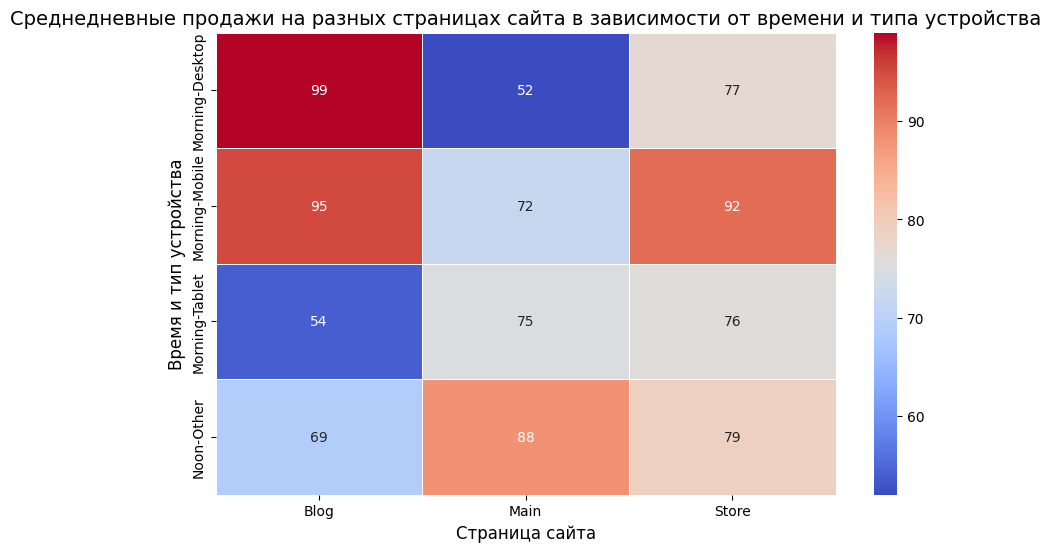

In [3]:
websites = ['Main', 'Main', 'Main', 'Main', 'Blog', 'Blog', 
            'Blog', 'Blog', 'Store', 'Store', 'Store', 'Store']
devices = ['Desktop', 'Mobile', 'Tablet', 'Other', 'Desktop', 
           'Mobile', 'Tablet', 'Other', 'Desktop', 'Mobile', 'Tablet', 'Other']
sales = np.random.randint(50, 100, size=12)
time = ['Morning', 'Morning', 'Morning', 'Noon', 'Morning', 'Morning', 
        'Morning', 'Noon', 'Morning', 'Morning', 'Morning', 'Noon']

df = pd.DataFrame({'Websites': websites, 'Devices': devices, 'Sales': sales, 'Time': time})

pivot_table = df.pivot_table(values='Sales', index=['Time', 'Devices'], columns='Websites', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='g', linewidths=0.5)

plt.title('Среднедневные продажи на разных страницах сайта в зависимости от времени и типа устройства', fontsize=14)
plt.xlabel('Страница сайта', fontsize=12)
plt.ylabel('Время и тип устройства', fontsize=12)

plt.show()

**2. Постройте столбчатую диаграмму расходов на еду, жилье, транспорт, развлечения и другие категории за один месяц. Для каждой категории необходимо отобразить средний расход и общее количество потраченных денег.**

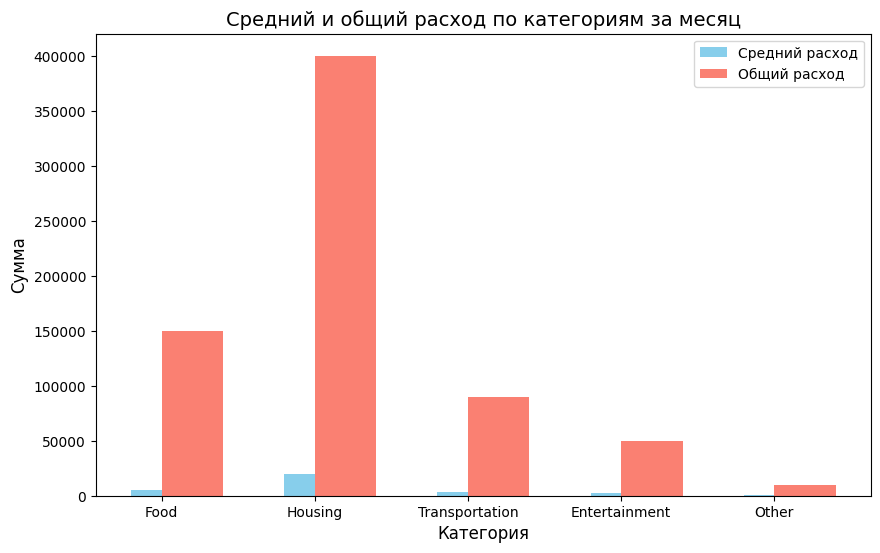

In [6]:
expenses = pd.DataFrame({
    'Category': ['Food', 'Housing', 'Transportation', 'Entertainment', 'Other'],
    'Mean': [5000, 20000, 3000, 2500, 1000],
    'Total': [150000, 400000, 90000, 50000, 10000]
})

fig, ax = plt.subplots(figsize=(10, 6))


bar1 = ax.bar(expenses['Category'], expenses['Mean'], width=0.4, label='Средний расход', color='skyblue', align='center')


bar2 = ax.bar(expenses['Category'], expenses['Total'], width=0.4, label='Общий расход', color='salmon', align='edge')


ax.set_title('Средний и общий расход по категориям за месяц', fontsize=14)
ax.set_xlabel('Категория', fontsize=12)
ax.set_ylabel('Сумма', fontsize=12)

ax.legend()

plt.show()


**3. Вам предоставлены данные о доходах клиентов банка по разным категориям дохода. Ваша задача - построить boxplot для каждой категории дохода и определить, есть ли выбросы в данных, а также вывести их списком на экран. Для работы с выбросами рекомендую воспользоваться методом `quantile()`.**

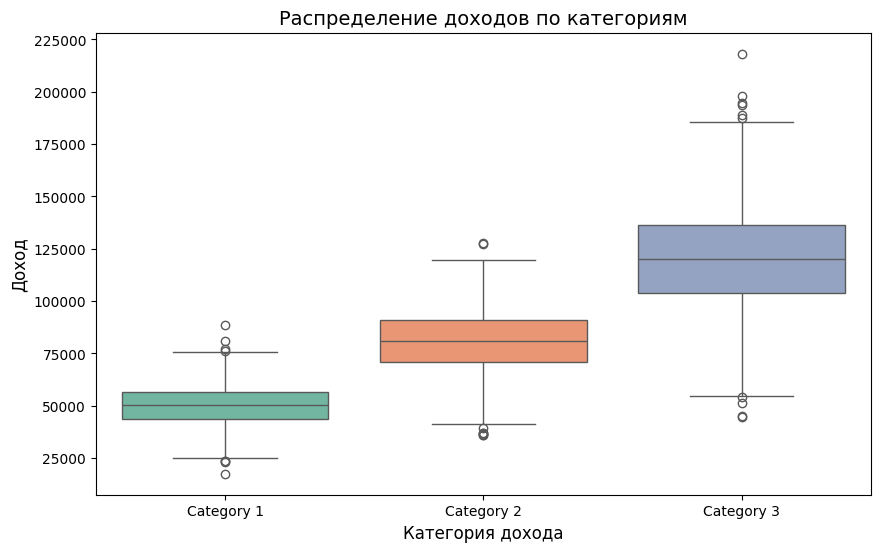

Выбросы для Category 1:
74     23802.548959
179    77201.691666
209    88527.314907
262    17587.326599
478    80788.808085
646    23031.133571
668    23490.301916
755    76323.820648
Name: Category 1, dtype: float64

Выбросы для Category 2:
61      37271.860691
101     36556.169327
539     36916.066801
591     36179.742748
615    127896.613518
750     39451.515605
957    127066.228005
971     35894.170480
Name: Category 2, dtype: float64

Выбросы для Category 3:
24      44512.196104
35     188991.500973
305    197747.963900
506    193727.360633
521    194631.475065
556     54106.306525
801    187325.841600
884     51312.378932
895    218155.942661
947     45221.600727
Name: Category 3, dtype: float64


In [ ]:
# генерируем случайные данные о доходах клиентов банка
np.random.seed(42)
data = pd.DataFrame({
    'Category 1': np.random.normal(50000, 10000, 1000),
    'Category 2': np.random.normal(80000, 15000, 1000),
    'Category 3': np.random.normal(120000, 25000, 1000)
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, palette='Set2')

plt.title('Распределение доходов по категориям', fontsize=14)
plt.xlabel('Категория дохода', fontsize=12)
plt.ylabel('Доход', fontsize=12)

plt.show()

def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

outliers_category1 = detect_outliers(data['Category 1'])
outliers_category2 = detect_outliers(data['Category 2'])
outliers_category3 = detect_outliers(data['Category 3'])

print("Выбросы для Category 1:")
print(outliers_category1)

print("\nВыбросы для Category 2:")
print(outliers_category2)

print("\nВыбросы для Category 3:")
print(outliers_category3)